In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# =================== Cancer  Dada Set  ============

In [2]:
# Cargamos los datos del fichero CSV
cancer_df = pd.read_csv('../../data/06_breast-cancer-wisconsin-data.csv')

# Imprimimos los datos cargados con pandas
#df.describe()
#df = df.set_index('id')
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## Preparamos Datos

In [3]:
le = preprocessing.LabelEncoder()
le.fit(cancer_df['diagnosis'])
cancer_df['diagnosis_cod'] = le.transform(cancer_df['diagnosis'])
cancer_df = cancer_df.drop(['Unnamed: 32','id','diagnosis'], axis=1)
cancer_df
#le.inverse_transform(iris_df.species_cod)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_cod
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,1
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,1
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,1
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,1


In [4]:
# separamos datos en data y target
cancer_data = cancer_df.drop(['diagnosis_cod'], axis=1)
cancer_target = cancer_df.diagnosis_cod


In [5]:
# Separamos los Datos.... Entrenamiento y test
#?  train_test_split()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target,
                                                    test_size=0.33,
                                                    random_state=None,
                                                    shuffle =None)

print('Set de datos para Entrenamiento =',len(X_train))
print('Set de datos para Test',len(X_test))
print('Total',len(X_test)+len(X_train))
print('Data Shape=',X_test.shape)
print('Target Shape =',y_test.shape)

X_train.head()
#X_train.columns

Set de datos para Entrenamiento = 381
Set de datos para Test 188
Total 569
Data Shape= (188, 30)
Target Shape = (188,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.5026,0.17320,0.2770,0.10630
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.09,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194
328,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.2947,0.3597,0.15830,0.3103,0.08200
145,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,0.07839,...,13.15,16.51,86.26,509.6,0.14240,0.2517,0.0942,0.06042,0.2727,0.10360
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247


# ======== Árbol de Decisión Cancer Data Set =========

In [6]:
## Modelo
arbol = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=4)

#? DecisionTreeClassifier

In [7]:
# ? cross_val_score()
cross_val_score(arbol, cancer_data, cancer_target)
arbol.fit(X_train,y_train)

print ("Score with data Tes",arbol.score(X_test,y_test))
print ("Score with data Train",arbol.score(X_train,y_train))

Score with data Tes 0.920212765957
Score with data Train 1.0


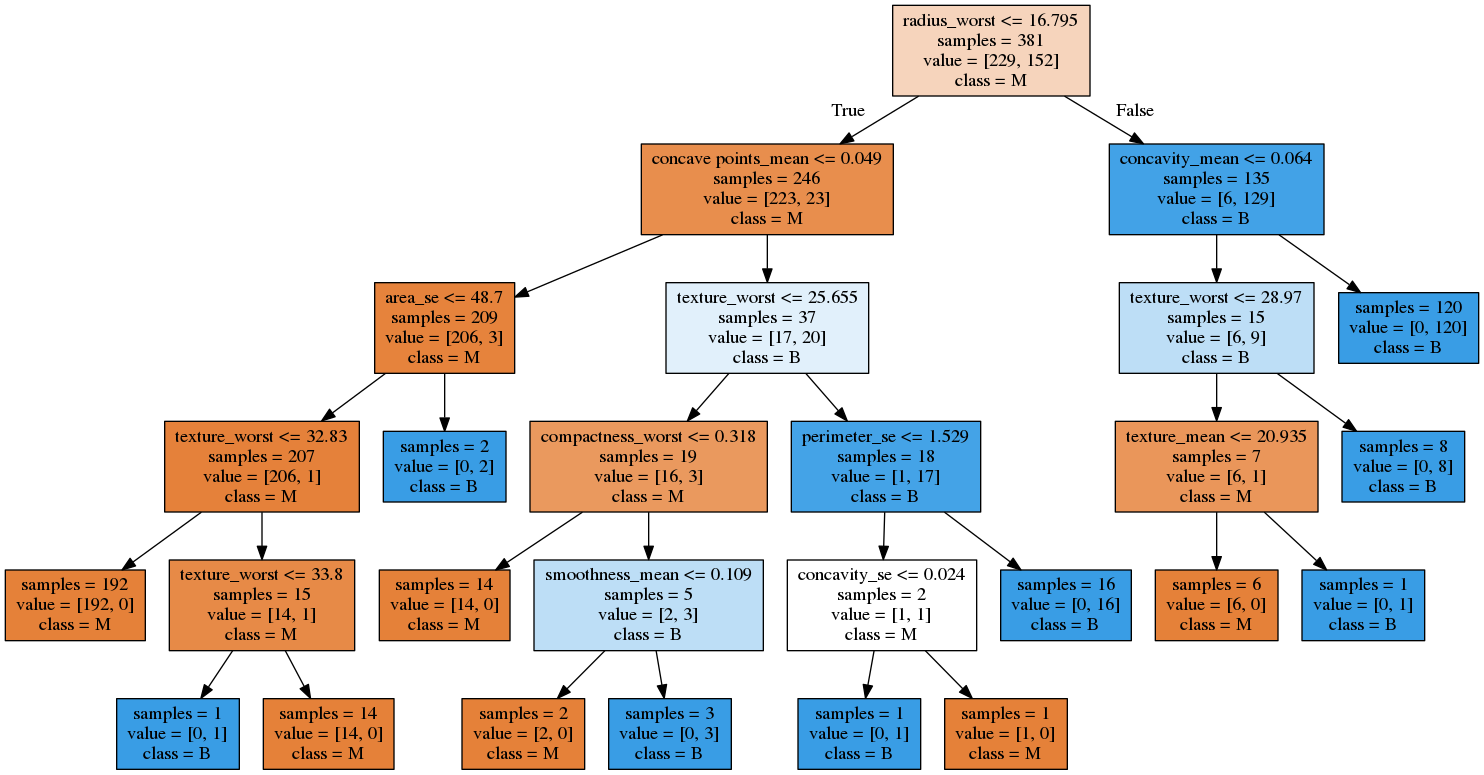

In [8]:
from sklearn.tree import export_graphviz
import graphviz

cancer_target_names = ['M','B']
cancer_feature_names =['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']



export_graphviz(arbol,out_file='arbol.dot',
                class_names=cancer_target_names,
                feature_names=cancer_feature_names,
                impurity=False,
                filled=True,
                rounded=False,
                max_depth=None,
                rotate=False,
               )

with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

!dot -Tpng arbol.dot -o arbol.png
Image('arbol.png', width=2e8)


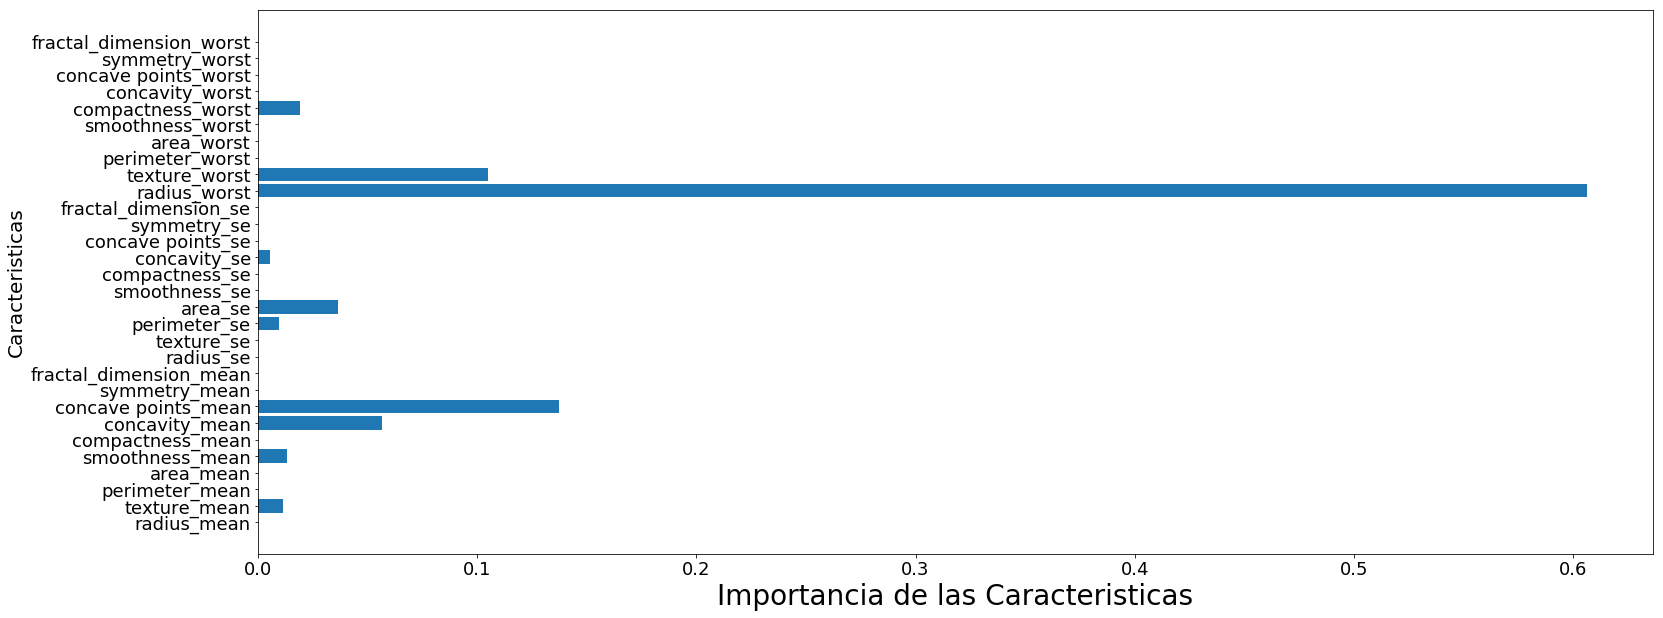

In [9]:
cara = cancer_data.shape[1]
plt.figure(figsize=(25, 10))
plt.barh(range(cara),arbol.feature_importances_)
plt.yticks(np.arange(cara),cancer_feature_names,fontsize=18)
plt.xlabel('Importancia de las Caracteristicas',fontsize=28)
plt.ylabel('Caracteristicas',fontsize=20)
plt.xticks(fontsize=18)
plt.show()

# =========== Alguna Predicción ==============

In [10]:
# Alguna Predicción....

ind = 413
a = cancer_data.ix[ind]
b = cancer_target.ix[ind]
new_x = a.values
print(a)
print('\ndiagnosis =>',b,le.inverse_transform(b))


prediccion = arbol.predict([new_x])
#prediccion = arbol.predict(X_test)
print('\npredicción =>',prediccion, le.inverse_transform(prediccion))

radius_mean                 14.990000
texture_mean                22.110000
perimeter_mean              97.530000
area_mean                  693.700000
smoothness_mean              0.085150
compactness_mean             0.102500
concavity_mean               0.068590
concave points_mean          0.038760
symmetry_mean                0.194400
fractal_dimension_mean       0.059130
radius_se                    0.318600
texture_se                   1.336000
perimeter_se                 2.310000
area_se                     28.510000
smoothness_se                0.004449
compactness_se               0.028080
concavity_se                 0.033120
concave points_se            0.011960
symmetry_se                  0.019060
fractal_dimension_se         0.004015
radius_worst                16.760000
texture_worst               31.550000
perimeter_worst            110.200000
area_worst                 867.100000
smoothness_worst             0.107700
compactness_worst            0.334500
concavity_wo

# ======== Random Forests  Cancer Data Set =========

In [11]:
# ---------------- Random Forests
#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('acc for training data: {:.2f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.2f}'.format(forest.score(X_test,y_test)))


# =========================================================================================
# Alguna Predicción....

ind = 496
a = cancer_data.ix[ind]
b = cancer_target.ix[ind]
new_x = a.values
print(a)
print('\ndiagnosis =>',b,le.inverse_transform(b))


prediccion = forest.predict([new_x])
#prediccion = arbol.predict(X_test)
print('\npredicción =>',prediccion, le.inverse_transform(prediccion))

acc for training data: 1.00
acc for test data: 0.95
radius_mean                 12.650000
texture_mean                18.170000
perimeter_mean              82.690000
area_mean                  485.600000
smoothness_mean              0.107600
compactness_mean             0.133400
concavity_mean               0.080170
concave points_mean          0.050740
symmetry_mean                0.164100
fractal_dimension_mean       0.068540
radius_se                    0.232400
texture_se                   0.633200
perimeter_se                 1.696000
area_se                     18.400000
smoothness_se                0.005704
compactness_se               0.025020
concavity_se                 0.026360
concave points_se            0.010320
symmetry_se                  0.017590
fractal_dimension_se         0.003563
radius_worst                14.380000
texture_worst               22.150000
perimeter_worst             95.290000
area_worst                 633.700000
smoothness_worst             0.15330

#  ================= Diabetes Data Set =============

In [12]:
# Cargamos los datos del fichero CSV
diabetes_df = pd.read_csv('../../data/06_diabetes.csv')

# Imprimimos los datos cargados con pandas
#diabetes_df.info()
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
# separamos datos en data y target
diabetes_data   = diabetes_df.drop(['diagnosis'], axis=1)
diabetes_target = diabetes_df.diagnosis

In [14]:
# Separamos los Datos.... Entrenamiento y test
#?  train_test_split()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target,
                                                    test_size=0.33,
                                                    random_state=None,
                                                    shuffle =None)

print('Set de datos para Entrenamiento =',len(X_train))
print('Set de datos para Test',len(X_test))
print('Total',len(X_test)+len(X_train))
print('Data Shape=',X_test.shape)
print('Target Shape =',y_test.shape)

X_train.head()
#X_train.columns

Set de datos para Entrenamiento = 514
Set de datos para Test 254
Total 768
Data Shape= (254, 8)
Target Shape = (254,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
629,4,94,65,22,0,24.7,0.148,21
690,8,107,80,0,0,24.6,0.856,34
477,7,114,76,17,110,23.8,0.466,31
43,9,171,110,24,240,45.4,0.721,54
374,2,122,52,43,158,36.2,0.816,28


In [15]:
## Modelo
arbol = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=4)
#arbol = DecisionTreeClassifier()

#? DecisionTreeClassifier

# ? cross_val_score()
cross_val_score(arbol, diabetes_data, diabetes_target)
arbol.fit(X_train,y_train)

print ("Score with data Tes",arbol.score(X_test,y_test))
print ("Score with data Train",arbol.score(X_train,y_train))

Score with data Tes 0.633858267717
Score with data Train 1.0


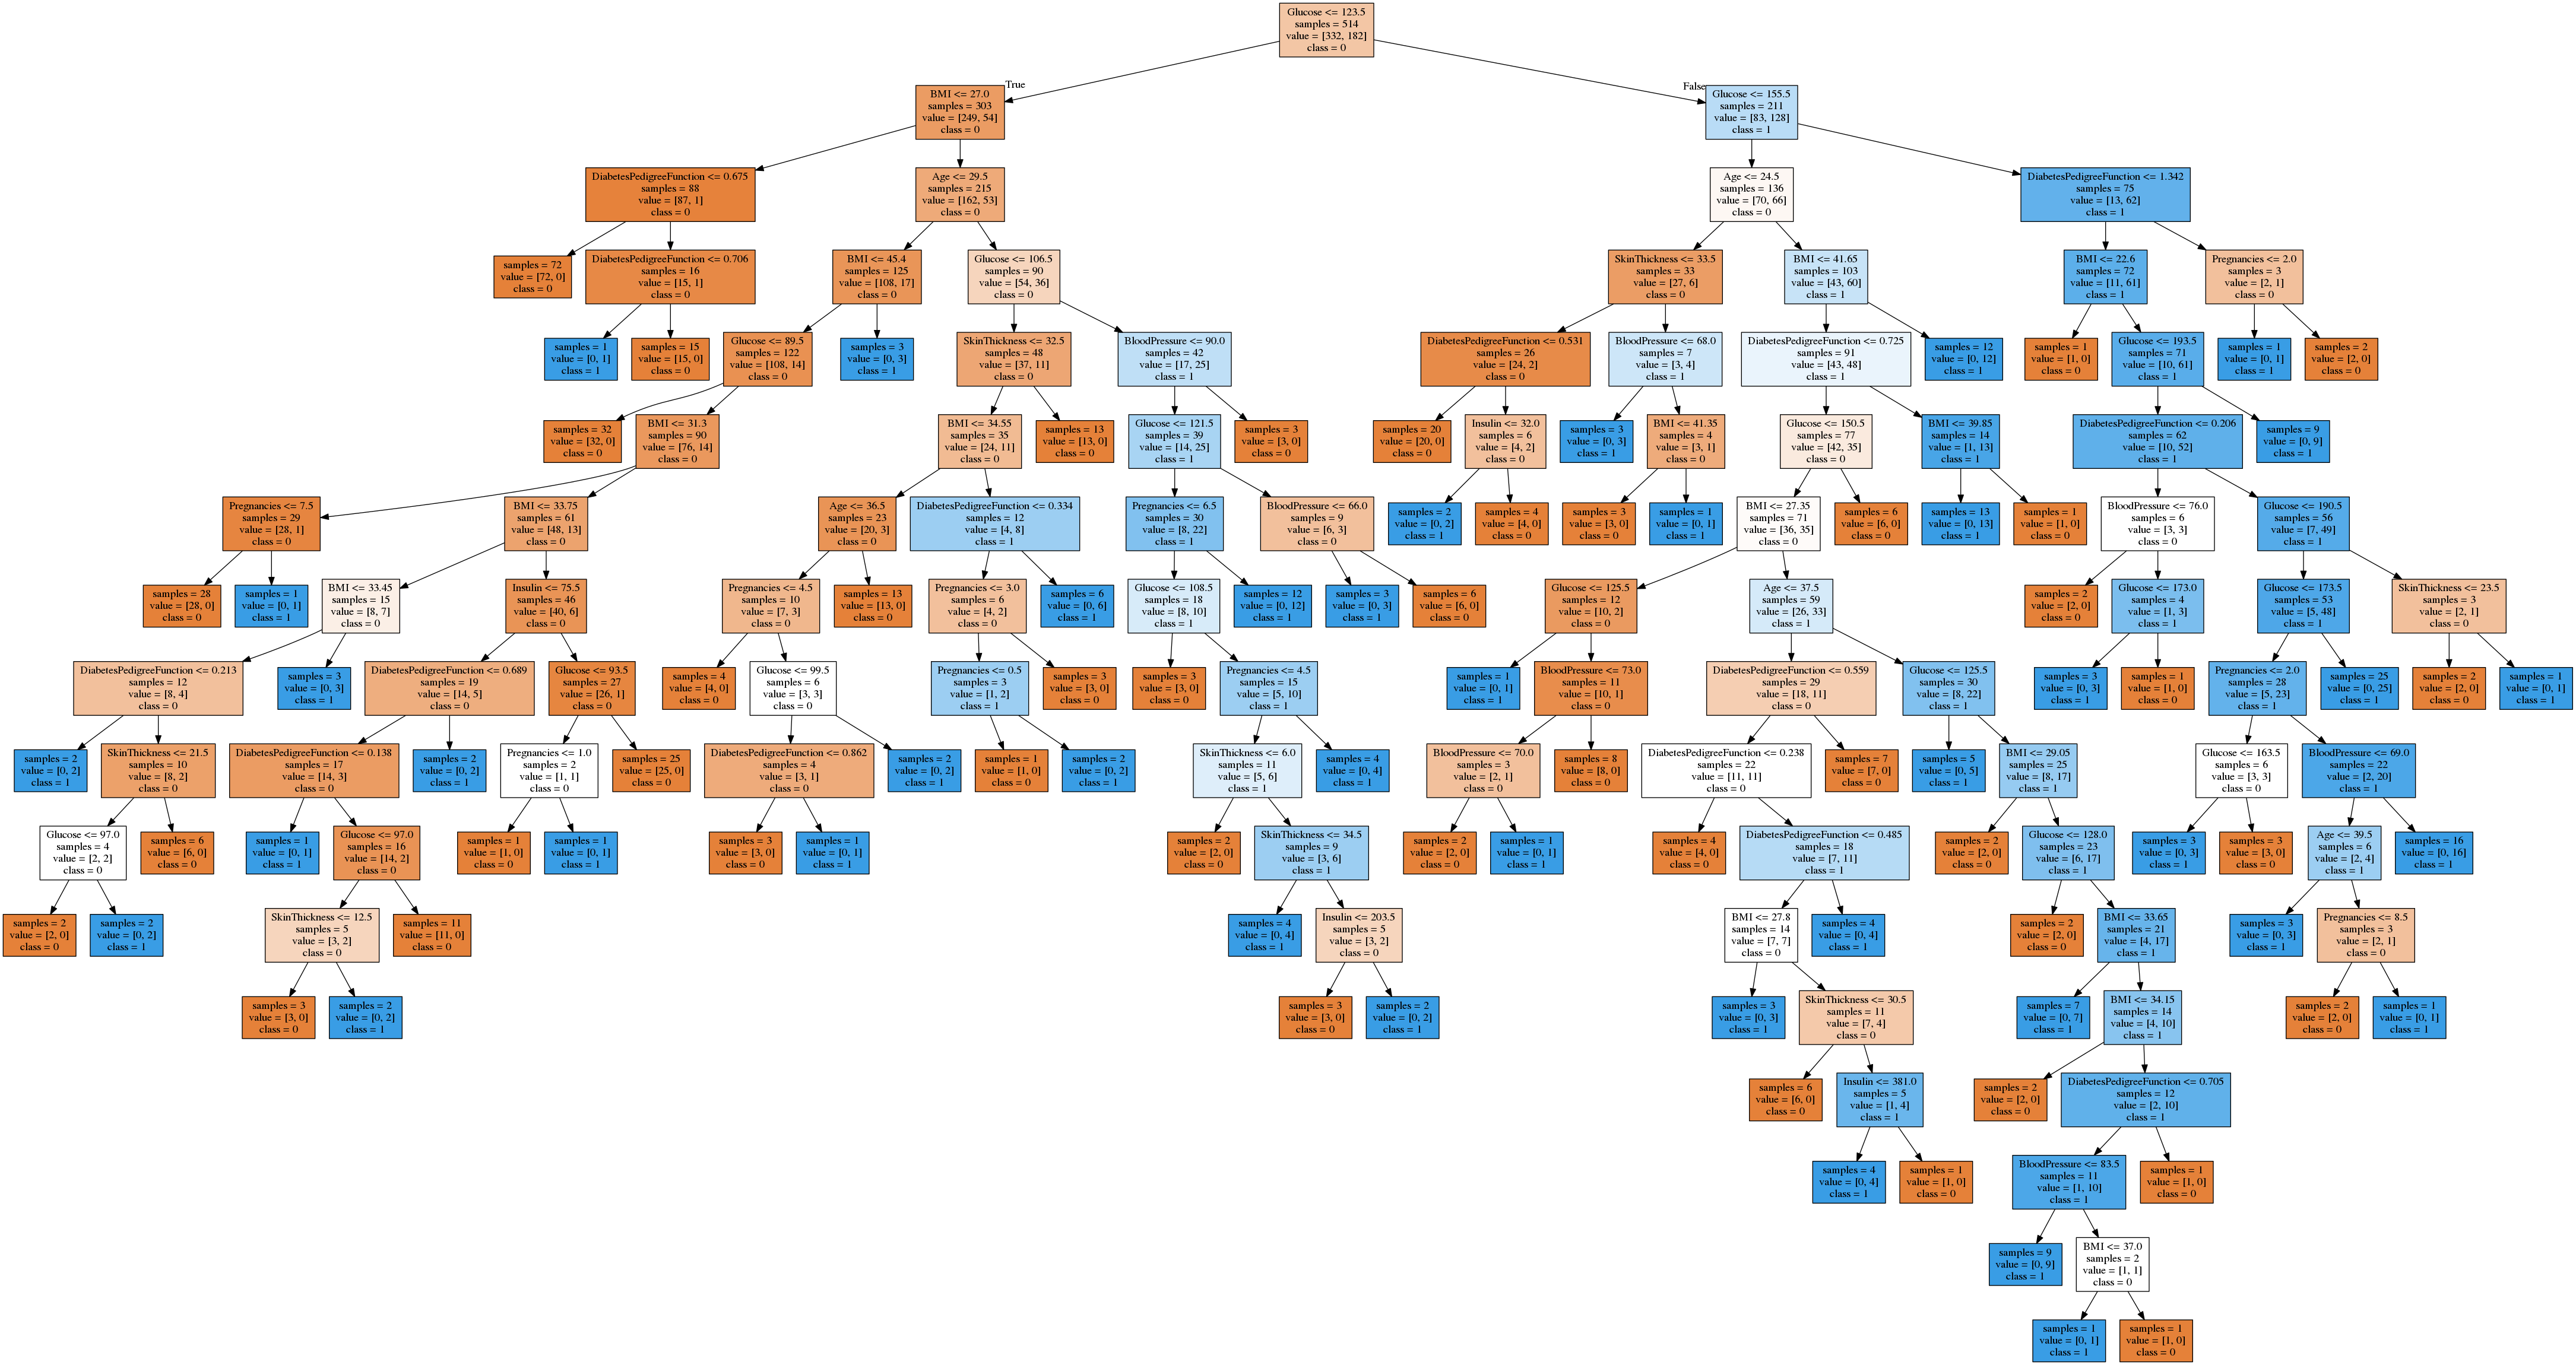

In [16]:
from sklearn.tree import export_graphviz
import graphviz

diabetes_target_names = ['0','1']
diabetes_feature_names = diabetes_data.columns


export_graphviz(arbol,out_file='arbol.dot',
                class_names=diabetes_target_names,
                feature_names=diabetes_feature_names,
                impurity=False,
                filled=True,
                rounded=False,
                max_depth=None,
                rotate=False,
               )

with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



!dot -Tpng arbol.dot -o arbol.png
Image('arbol.png', width=4e8)


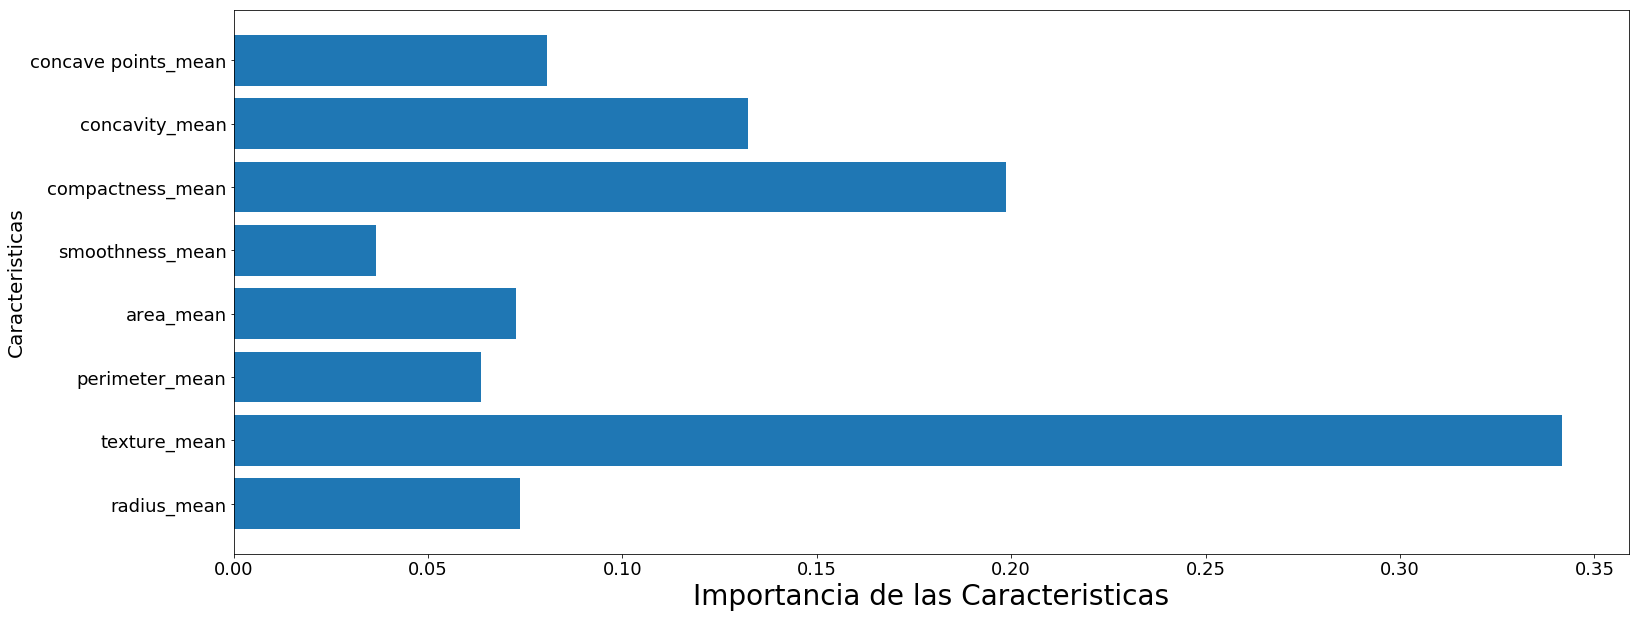

In [17]:
cara = diabetes_data.shape[1]
plt.figure(figsize=(25, 10))
plt.barh(range(cara),arbol.feature_importances_)
plt.yticks(np.arange(cara),cancer_feature_names,fontsize=18)
plt.xlabel('Importancia de las Caracteristicas',fontsize=28)
plt.ylabel('Caracteristicas',fontsize=20)
plt.xticks(fontsize=18)
plt.show()

In [18]:
# Alguna Predicción....

ind = 58
a = diabetes_data.ix[ind]
b = diabetes_target.ix[ind]
new_x = a.values
print(a)
print('\ndiagnosis =>',b)


prediccion = arbol.predict([new_x])
#prediccion = arbol.predict(X_test)
print('\npredicción =>',prediccion)

Pregnancies                   0.000
Glucose                     146.000
BloodPressure                82.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          40.500
DiabetesPedigreeFunction      1.781
Age                          44.000
Name: 58, dtype: float64

diagnosis => 0

predicción => [0]


# ========== Random Forests Diabetes Data Set ======

In [19]:
# ---------------- Random Forests
#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('acc for training data: {:.2f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.2f}'.format(forest.score(X_test,y_test)))


acc for training data: 1.00
acc for test data: 0.75


In [20]:
# Alguna Predicción....

ind = 13
a = diabetes_data.ix[ind]
b = diabetes_target.ix[ind]
new_x = a.values
print(a)
print('\ndiagnosis =>',b)


prediccion = forest.predict([new_x])
#prediccion = arbol.predict(X_test)
print('\npredicción =>',prediccion)

Pregnancies                   1.000
Glucose                     189.000
BloodPressure                60.000
SkinThickness                23.000
Insulin                     846.000
BMI                          30.100
DiabetesPedigreeFunction      0.398
Age                          59.000
Name: 13, dtype: float64

diagnosis => 1

predicción => [1]


In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

p =forest.predict(X_test)


print ('Accuracy:', accuracy_score(y_test, p))
print ('\nConfusion Matrix:\n', confusion_matrix(y_test, p))
print ('\nClassification Report:', classification_report(y_test, p))


Accuracy: 0.748031496063

Confusion Matrix:
 [[135  33]
 [ 31  55]]

Classification Report:              precision    recall  f1-score   support

          0       0.81      0.80      0.81       168
          1       0.62      0.64      0.63        86

avg / total       0.75      0.75      0.75       254

